# Example: How to talk to SkyServer

SciServer Compute can talk to all the other components of SciServer through a series of <em>modules</em>, one for each component. This example notebook shows how to use the SkyServer module. Examples include...

You are welcome (and encouraged!) to copy these examples into another folder and modify them to meet your needs. You can use them as a starting point to create your own scripts. Please do not edit this notebook directly, because your edits may be overwritten if changes to the SciServer modules require changes to these example notebooks.

To run the example Python scripts in this notebook, click in any of the Code cells below (the ones with the gray backgrounds). Click the play button at the top of the window (just below the menubar) to run the script, or pres Shift-Enter. The output of each cell's script will appear directly below the cell.

## Import modules

Like any Python modules, the SciServer modules must be imported before being used. The next code block first imports the SciServer modules you will need for this example notebook, then imports some other required modules. Comments in the code block explain what each module does. To learn how to import other modules, see the Python 3.5 import documentation (https://docs.python.org/3.5/reference/import.html), or the documentation of the module(s) you are trying to import.

In [5]:
import SciServer                      # Collection of all SciServer modules
from SciServer import SkyServer       # Communicate between SciServer Compute and SkyServer
from SciServer import CasJobs         # Communicate between SciServer Compute and SkyServer
print('Imported SciServer modules')

from matplotlib import pyplot as plt  # pyplot: a commonly-used plotting module (https://matplotlib.org/api/pyplot_api.html)
from pprint import pprint             # pprint: print data structures in readable format (https://docs.python.org/3.5/library/pprint.html)
print('Imported other needed modules')

Imported SciServer modules
Imported other needed modules


## Get help

At any point after the modules are imported, you can type "help(<em>name of module</em>)" to read the documentation for that module. This is true for all SciServer modules and most other modules as well. Try it below.

In [8]:
# Read the help document for the SkyServer module
help(SkyServer)

# Read the help document for all modules in the SciServer system (uncomment by removing the # before running)
#help(SciServer)

Help on module SciServer.SkyServer in SciServer:

NAME
    SciServer.SkyServer

FUNCTIONS
    getJpegImgCutout(ra, dec, scale=0.7, width=512, height=512, opt='', query='', dataRelease=None)
        Gets a rectangular image cutout from a region of the sky in SDSS, centered at (ra,dec). Return type is numpy.ndarray.
        
        
        :param ra: Right Ascension of the image's center.
        :param dec: Declination of the image's center.
        :param scale: scale of the image, measured in [arcsec/pix]
        :param width: Right Ascension of the image's center.
        :param ra: Right Ascension of the image's center.
        :param height: Height of the image, measured in [pix].
        :param opt: Optional drawing options, expressed as concatenation of letters (string). The letters options are 
        
            "G": Grid. Draw a N-S E-W grid through the center
        
            "L": Label. Draw the name, scale, ra, and dec on image.
        
            "P PhotoObj. Dra

## Get images

SkyServer's <a href='http://skyserver.sdss.org/public/en/tools/chart/navi.aspx'>Navigate</a> and <a href='http://skyserver.sdss.org/public/en/tools/chart/chartinfo.aspx'>Finding Chart</a> tools show images of the sky as seen by the Sloan Digital Sky Survey (SDSS). Both tools work by calling the SDSS Image Cutout web service to generate an image of a region of sky. The SkyServer module includes a command to call the Image Cutout service. This means that you can generate your own SDSS images as part of your scripts.

The two examples below show how to use this command, <code>SkyServer.getJpegImgCutout</code>, to retrieve a sky image around one of the most famous objects discovered by the SDSS, <a href='https://daily.zooniverse.org/2013/09/24/hannys-voorwerp/'>Hanny's Voorwerp</a>. The first code cell shows the simplest way to get an image, by specifying only the ra/dec position of the image center. The second shows how to customize the image by specifying more options.

These examples rely on the Python <a href='https://matplotlib.org/api/pyplot_api.html'>pyplot</a> library, which you imported above. For more information on the SkyServer module, see <a href='http://www.sciserver.org/docs/sciscript-python/SciServer.html#sciserver-skyserver-module'>its documentation</a> at sciserver.org.

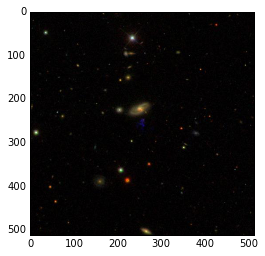

In [9]:
# Get SDSS image - simple example for Hanny's Voorwerp with only required parameters.

ra_center = 145.2658   # RA of image center as decimal degrees
dec_center = 34.7265   # Dec of image center as decimal degrees

img = SkyServer.getJpegImgCutout(ra = ra_center, dec = dec_center)  # create image using SkyServer.getJpegImgCutout

plt.imshow(img)    # show image using pyplot.imshow

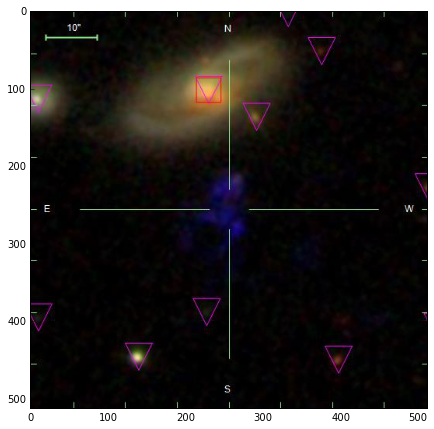

In [11]:
# Get SDSS image - customized example for Hanny's Voorwerp specifying more parameters.

# Required parameters
ra = 145.2658   # RA of image center as decimal degrees
dec_center = 34.7265   # Dec of image center as decimal degrees

# Optional parameters (see the command below for how they are sent to SkyServer.getJpegImgCutout)
pixel_scale = 0.15     # pixel scale in arcsec/pixel (default = 0.7; native SDSS = 0.4)
imgwidth = 512  # width of image in pixels (default = 512)
imgheight = 512 # height of image in pixels (default = 512)
SkyServer_DataRelease = "DR14"  # SDSS data release to use (latest is DR14)

option_list = 'SG'  # string containing one-letter codes for options - for a list, see http://www.sciserver.org/docs/sciscript-python/SciServer.html#sciserver-skyserver-module

# Optionally, you can send an SQL query, and results will be marked on the image with purple triangles
my_query = 'SELECT p.objID, p.ra, p.dec \n'
my_query += 'FROM fGetNearbyObjEq(145.2658,34.7265,1) y \n'
my_query += 'JOIN PhotoPrimary p ON y.objID=p.objID \n'
my_query += 'WHERE p.clean=1'

# SkyServer.getJpegImgCutout generates the image (described at http://www.sciserver.org/docs/sciscript-python/SciServer.html#sciserver-skyserver-module)
img = SkyServer.getJpegImgCutout(ra = ra_center, dec = dec_center, scale = pixel_scale, 
                                 width = imgwidth, height = imgheight, 
                                 dataRelease = SkyServer_DataRelease, opt = option_list, 
                                 query = my_query)


# Generate image with pyplot.imshow at a custom size
resolution = 72 # used to convert pixels to inches as required by pyplot (pixels per inch; screen = 72, print = 300)
figwidth = imgwidth / resolution
figheight = imgheight / resolution

plt.figure(figsize=(figwidth,figheight))
plt.imshow(img)

## Get data for a known object

The SkyServer <a href='http://skyserver.sdss.org/public/en/tools/quicklook/summary.aspx'>Quick Look</a> and <a href='http://skyserver.sdss.org/public/en/tools/quicklook/summary.aspx'>Explore</a> tools provide complete SDSS data about single astronomical objects (stars, galaxies, quasars, etc.). You can retrieve any or all of this information into your scripts with the <code>SkyServer.objectSearch</code> command.

The <code>SkyServer.objectSearch</code> command takes as input any of five 

In [13]:
# Do an object search based on RA,Dec coordinates. 
# This is for IC 2497, companion galaxy to Hanny's Voorwerp.
# Returns a Python dictionary.

# You can search by SDSS objId, position, or SDSS run/camcol/field
ic2497 = SkyServer.objectSearch(objId=1237661382772195474)
#ic2497 = SkyServer.objectSearch(ra=145.2671, dec=34.7328)
#ic2497 = SkyServer.objectSearch(plate=5798, mjd=56326, fiber=532)

# For objects with spectra, you can additionally search by specObjId or plate/mjd/fiber
#ic2497 = SkyServer.objectSearch(run=3704, rerun=301, camcol=3, field=91, obj=146)
#ic2497 = SkyServer.objectSearch(specObjId=6528114001053618176)

pprint(ic2497)  # Use Python's pprint module to produce human-readable output

[{'Rows': [{'apid': '',
            'id': 1237661382772195474,
            'name': '',
            'objId': '0x112d0e78605b0092',
            'specId': 6528114001053618176,
            'specObjId': '0x5a988518b60e1000'}],
  'TableName': 'objectInfo'},
 {'Rows': [{'camcol': 3,
            'clean': 1,
            'dec': 34.7329058161616,
            'field': 91,
            'mjd': 52705,
            'mode': 1,
            'obj': 146,
            'objid': 1237661382772195474,
            'otype': 'GALAXY',
            'ra': 145.267149111579,
            'rerun': 301,
            'run': 3704,
            'specObjId': 6528114001053618176,
            'survey': 'boss'}],
  'TableName': 'MetaData'},
 {'Rows': [{'GalaxyZoo_Morph': '-',
            'Other observations': 0,
            'camcol': 3,
            'clean': 1,
            'dec': 34.7329058161616,
            'err_g': 0.002797565,
            'err_i': 0.002263328,
            'err_r': 0.002337558,
            'err_u': 0.01585742,
    

In [9]:
# do a radial search of objects: abell 2255

df = SkyServer.radialSearch(ra=258.25, dec=64.05, radius=5, dataRelease=SkyServer_DataRelease)
df

,objid,run,rerun,camcol,field,obj,type,ra,dec,u,g,r,i,z,Err_u,Err_g,Err_r,Err_i,Err_z
0,1237671939804562410,6162,301,3,133,1002,3,258.063650,64.050667,23.14498,22.33704,21.78537,21.48095,21.35570,0.988865,0.188491,0.163356,0.183748,0.625124
1,1237671939804561494,6162,301,3,133,86,6,258.072335,64.040309,24.22702,20.88815,19.46177,18.49084,17.99513,0.904420,0.031100,0.014034,0.009903,0.020055
2,1237671939804561530,6162,301,3,133,122,6,258.061067,64.044919,25.01977,22.98697,21.93208,20.78950,20.40485,0.960866,0.177916,0.096312,0.051763,0.140298
3,1237671939804561474,6162,301,3,133,66,3,258.067495,64.036772,19.86892,17.79200,16.80831,16.36035,16.00596,0.051921,0.005854,0.004134,0.004003,0.007428
4,1237671939804562919,6162,301,3,133,1511,6,258.280990,63.993372,23.47723,23.39547,22.73410,23.20408,21.98686,0.630001,0.248200,0.188457,0.375615,0.481963
5,1237671939804627818,6162,301,3,134,874,6,258.301032,63.988084,24.89932,23.14048,21.81878,20.82631,19.89158,0.894588,0.189572,0.081428,0.049144,0.086382
6,1237671939804628507,6162,301,3,134,1563,6,258.290770,63.992440,25.86926,24.71142,25.10136,24.13266,21.02557,0.511769,0.529784,0.552365,0.538376,0.220853
7,1237671939804627259,6162,301,3,134,315,6,258.302361,63.996704,21.83516,19.14232,17.71337,17.02580,16.64633,0.161295,0.010095,0.005793,0.005356,0.009210
8,1237671939804627260,6162,301,3,134,316,6,258.302197,63.995026,24.00592,23.67428,22.74873,22.24541,21.09183,0.831315,0.299327,0.184804,0.167602,0.242881
9,1237671939804627791,6162,301,3,134,847,3,258.285313,63.999938,24.93824,21.90361,20.37194,19.74895,19.28590,1.308284,0.092591,0.035049,0.029439,0.075911


In [11]:
#do rectangular search of objects:

df = SkyServer.rectangularSearch(min_ra=258.1, max_ra=258.4, min_dec=63.8,max_dec=64.2, dataRelease=SkyServer_DataRelease)
df

,objid,run,rerun,camcol,field,obj,type,ra,dec,u,g,r,i,z,Err_u,Err_g,Err_r,Err_i,Err_z
0,1237671939804627816,6162,301,3,134,872,6,258.326188,63.922518,22.42574,21.30858,20.99740,20.84791,21.00385,0.250471,0.042069,0.041845,0.049960,0.220244
1,1237671939804562911,6162,301,3,133,1503,6,258.298817,63.916830,24.70961,24.99663,22.80564,23.46576,21.96781,0.889166,0.574017,0.189791,0.420021,0.444173
2,1237671939804562597,6162,301,3,133,1189,3,258.260220,63.917640,23.23272,22.50611,21.85210,22.28203,20.74283,0.666081,0.150531,0.125223,0.256733,0.270828
3,1237671939804562903,6162,301,3,133,1495,3,258.281924,63.919944,25.07457,23.15358,21.04083,20.01136,19.39154,1.243340,0.280036,0.062747,0.037619,0.085431
4,1237671939804561580,6162,301,3,133,172,6,258.227401,63.918903,15.50002,14.71399,13.33138,13.14050,13.32810,0.005522,0.004319,0.002855,0.002525,0.005020
5,1237671939804561583,6162,301,3,133,175,3,258.225538,63.921416,24.07656,25.11246,22.39621,21.81344,22.82684,0.914901,0.668991,0.154355,0.132646,0.675185
6,1237671939804561586,6162,301,3,133,178,6,258.217556,63.916703,25.36222,23.77666,22.77976,23.56922,22.85231,0.704950,0.320012,0.183825,0.447301,0.579350
7,1237671939804562429,6162,301,3,133,1021,3,258.117584,63.940099,22.10800,21.56266,20.37089,19.86481,19.34681,0.360397,0.089089,0.045349,0.043270,0.111353
8,1237671768005674277,6122,301,3,130,1317,6,258.214198,63.800561,25.05746,23.90262,22.37433,21.45002,21.09316,0.900597,0.334229,0.123554,0.083026,0.269814
9,1237671768005674331,6122,301,3,130,1371,3,258.268484,63.901390,25.14904,24.29548,22.75941,21.74678,21.30374,0.894514,0.439508,0.177233,0.109285,0.329755


In [6]:
# Exectute an SQL query, get results as a pandas dataframe

SkyServer_TestQuery = "select top 1 specobjid, ra, dec from specobj order by specobjid"
SkyServer_DataRelease = "DR14"

df = SkyServer.sqlSearch(sql=SkyServer_TestQuery, dataRelease=SkyServer_DataRelease)

df # NOTE: pandas formatted output occurs by default *only if* it is the last command in a cell. Otherwise, use print(df).
#print(df)

# Queries in SkyServer are limited: they must run in 90 seconds or less and return 500,000 rows or less.
# Results of SkyServer queries are only available as a pandas dataframe
# If you need to run longer queries and/or other result formats, see the SciServer.CasJobs module (uncomment below for docs)
#help(CasJobs)

,specobjid,ra,dec
0,299489677444933632,146.71421,-1.041304
